## Reto 1: Pruebas A/B

### 1. Objetivos:
    - Practicar evaluar los resultados de una Prueba A/B
 
---
    
### 2. Desarrollo:

### a) Evaluando una prueba A/B de flujo de ventas

El archivo 'ab_test-sales_pipeline-2' tiene datos muy similares a los que vimos en el último ejemplo. Estamos evaluando dos flujos de ventas distintos: A y B. Cada vez que alguien compró el producto gracias a uno de los dos flujos, se registró como un `1` en la columna `conversion` y un `0` en la columna `no conversion`.

Evalúa la prueba A/B para saber si los resultados obtenidos son estadísticamente significativos. El Reto consiste en los siguientes pasos:

1. Primero cuantifica cuál de los flujos de ventas fue más efectivo y en qué proporción.
2. Después aplica el test de permutación:
    1. Combina los resultados de ambos grupos en un mismo conjunto de datos
    2. Revuelve los datos
    3. Usando muestreo aleatorio sin reposición, construye un nuevo grupo A del mismo tamaño que el original.
    4. El resto de los datos conforman nuestro nuevo grupo B.
    5. Cuantifica la métrica o estadística que calculaste con los grupos originales y guarda el resultado.
    6. Repite los pasos 1-5 `R` veces para obtener una distribución de la estadística de interés.
3. Grafica tus resultados en un histograma y grafica una línea vertical que marque el resultado del experimento.
4. Cuantifica el Valor P y evalúa la significación estadística con un Alfa de 0.05 (5%).
5. Comenta tus hallazgos con tus compañeros y la experta.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/BEDU_DS/FASE_3/Remoto Datasets/Remoto ab_test-sales_pipeline-2.csv')

df

,test,conversion,no conversion
0,A,0,1
1,B,0,1
2,A,0,1
3,A,0,1
4,B,0,1
...,...,...,...
76322,B,0,1
76323,A,0,1
76324,B,0,1
76325,B,1,0


In [ ]:
total_count=df.groupby("test")[["conversion", "no conversion"]].sum()
total_count

,conversion,no conversion
test,,
A,4163,30576
B,4841,36747


In [ ]:
total_count["success rate"] = total_count["conversion"]/(total_count["conversion"]+total_count["no conversion"])
total_count

,conversion,no conversion,success rate
test,,,
A,4163,30576,0.119836
B,4841,36747,0.116404


In [ ]:
diff_prueba= 1 - (total_count.loc["B"]["success rate"] / total_count.loc["A"]["success rate"])
diff_prueba

0.028645069159369485

mezclamos las mediciones del test A y el B en el mismo DataFrame.

In [ ]:
all_measurements = df[['conversion', 'no conversion']]
all_measurements

,conversion,no conversion
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
76322,0,1
76323,0,1
76324,0,1
76325,1,0


In [ ]:
value_counts = df['test'].value_counts()

value_counts

B    41588
A    34739
Name: test, dtype: int64

Ahora vamos a aplicar el resto del algoritmo del test de permutación:

1.   Usando muestreo aleatorio sin reposición, construye un nuevo grupo A del mismo tamaño que el original.
2.   El resto de los datos conforman nuestro nuevo grupo B.
3.   Cuantifica la métrica o estadística que calculaste con los grupos originales y guarda el resultado.
4.   Repite los pasos 1-5 R veces para obtener una distribución de la estadística de interés.









In [ ]:
conv_a = []
no_conv_a = []
conv_b = []
no_conv_b = []

for _ in range(1000):
    a = df.sample(value_counts.loc['A'], replace=False)
    conv_a.append(a['conversion'].sum())
    no_conv_a.append(a['no conversion'].sum())
    
    b = df.loc[~df.index.isin(a.index)] #todos los elementos que no estan en el indice de a
    conv_b.append(b['conversion'].sum()) 
    no_conv_b.append(b['no conversion'].sum())

In [ ]:
perm_results = pd.DataFrame({
    'conv_a': conv_a,
    'no_conv_a': no_conv_a,
    'conv_b': conv_b,
    'no_conv_b': no_conv_b
})

perm_results

,conv_a,no_conv_a,conv_b,no_conv_b
0,4076,30663,4928,36660
1,4033,30706,4971,36617
2,4071,30668,4933,36655
3,4005,30734,4999,36589
4,4166,30573,4838,36750
...,...,...,...,...
995,4109,30630,4895,36693
996,4115,30624,4889,36699
997,4130,30609,4874,36714
998,4026,30713,4978,36610


In [ ]:
perm_results['a_conv_rate'] = perm_results['conv_a'] / (perm_results['conv_a'] + perm_results['no_conv_a'])
perm_results['b_conv_rate'] = perm_results['conv_b'] / (perm_results['conv_b'] + perm_results['no_conv_b'])

In [ ]:
perm_results

,conv_a,no_conv_a,conv_b,no_conv_b,a_conv_rate,b_conv_rate,diff
0,4076,30663,4928,36660,0.117332,0.118496,-0.009917
1,4033,30706,4971,36617,0.116094,0.119530,-0.029591
2,4071,30668,4933,36655,0.117188,0.118616,-0.012184
3,4005,30734,4999,36589,0.115288,0.120203,-0.042629
4,4166,30573,4838,36750,0.119923,0.116332,0.029946
...,...,...,...,...,...,...,...
995,4109,30630,4895,36693,0.118282,0.117702,0.004902
996,4115,30624,4889,36699,0.118455,0.117558,0.007571
997,4130,30609,4874,36714,0.118887,0.117197,0.014209
998,4026,30713,4978,36610,0.115893,0.119698,-0.032834


In [ ]:
perm_results['diff'] = 1 - (perm_results['b_conv_rate'] / perm_results['a_conv_rate'])

perm_results

,conv_a,no_conv_a,conv_b,no_conv_b,a_conv_rate,b_conv_rate,diff
0,4076,30663,4928,36660,0.117332,0.118496,-0.009917
1,4033,30706,4971,36617,0.116094,0.119530,-0.029591
2,4071,30668,4933,36655,0.117188,0.118616,-0.012184
3,4005,30734,4999,36589,0.115288,0.120203,-0.042629
4,4166,30573,4838,36750,0.119923,0.116332,0.029946
...,...,...,...,...,...,...,...
995,4109,30630,4895,36693,0.118282,0.117702,0.004902
996,4115,30624,4889,36699,0.118455,0.117558,0.007571
997,4130,30609,4874,36714,0.118887,0.117197,0.014209
998,4026,30713,4978,36610,0.115893,0.119698,-0.032834


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


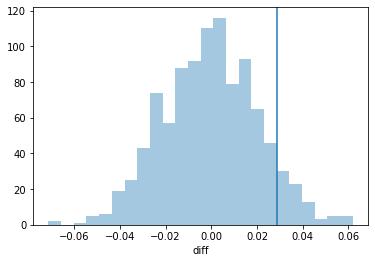

In [ ]:
sns.distplot(perm_results['diff'], kde=False, norm_hist=False)

plt.axvline(diff_prueba);

P-VALUE

In [ ]:
(perm_results['diff'] >= diff_prueba).sum() / perm_results.shape[0]

0.079

In [ ]:
perm_results.shape

(1000, 7)

Esto quiere decir que el 7.9% de los test que hicimos obtuvieron un valor igual o mayor que el obtenido en el experimento. Esto es muy cercano a un alfa de 5%, por lo que nuestro resultado no es cuestion de azar simplemente pero no podemos concluir que sea estadisticamente significativo.